# Definindo o melhor valor para K

- Começando com o dataset load_wine do scikit-learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
import pandas as pd
base = pd.read_csv("cartaocredito.csv")
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Separando as variaveis

In [2]:
X = base.drop("Class", axis = 1)
y = base.Class

### Treino e teste

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [5]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
198687,132606.0,1.974025,-1.240696,-0.537317,-0.919764,-1.085459,-0.265272,-0.974899,0.039702,-0.140586,...,0.133557,0.038919,-0.085885,0.272160,-0.422904,-0.534651,-0.487102,-0.004465,-0.040389,91.00
129694,79188.0,1.151280,-0.067410,1.274530,1.348017,-1.024868,-0.211370,-0.591920,0.118255,0.964253,...,-0.163537,-0.067541,-0.012958,0.001064,0.382891,0.398440,-0.407721,0.069214,0.037420,9.99
204218,135171.0,2.076327,0.042540,-1.803333,0.385207,0.401630,-0.735175,0.072287,-0.120261,0.716797,...,-0.246575,-0.385648,-1.066798,0.342803,0.280876,-0.298808,0.191718,-0.068979,-0.035671,1.98
134361,80771.0,0.951966,-1.002169,0.649152,0.089675,-1.505037,-0.869371,-0.330709,-0.275044,-0.912232,...,-0.029575,-0.035766,0.021394,-0.168223,0.784533,0.254052,0.615930,-0.031235,0.060012,204.90
173252,121404.0,-0.418134,-0.093914,0.306298,-2.548619,0.683397,-0.302791,0.554178,-0.103122,-0.808220,...,0.030008,-0.064795,-0.081516,0.115211,0.220057,-0.426465,-0.610719,0.093378,-0.027043,5.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,2937.0,-0.415022,0.713439,1.221551,-2.108216,0.187067,-1.281616,1.118548,-0.345326,0.463473,...,0.075377,0.132886,0.756938,-0.290888,0.558730,0.037363,-0.871689,0.239482,-0.020422,1.00
233802,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
85418,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
29062,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42


# Definindo o melhor valor de K para SelectKBest

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

### Criando as funções para SelectKBest e DecisionTreeClassifier

In [7]:
def selecionarColunas(i):
    seletor = SelectKBest(k=i)
    seletor.fit(X_train,y_train)
    return seletor.get_feature_names_out()

In [8]:
def arvoreDecisao():
    clf = DecisionTreeClassifier(random_state=0)
    X_train_best = X_train.loc[:,colunas]
    X_test_best = X_test.loc[:,colunas]
    clf = clf.fit(X_train_best, y_train)
    return clf.predict(X_test_best)

## Testando diferentes valores para K

In [9]:
k = []
f1 = []

for i in range(1,len(X_train.columns)):
    
    # Selecionando as colunas
    colunas = selecionarColunas(i)
    
    # Realizando previsão 
    y_predict = arvoreDecisao()
     
    # Avaliando o modelo
    f1_k = f1_score(y_test, y_predict)
    
    
    # Salvando as informações
    k.append(i)
    f1.append(f1_k)

## Visualizando o desempenho de cada K com o f1_score

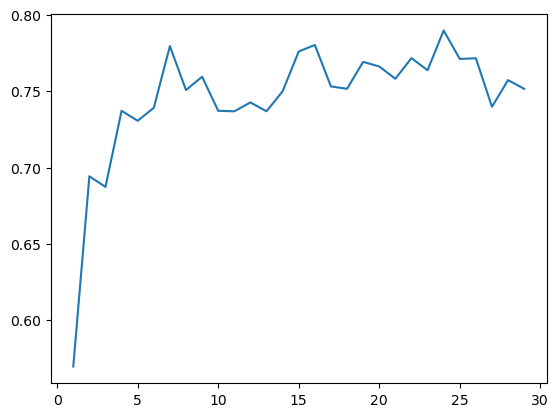

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(k, f1)

plt.show()

### Assim podemos ver o desempenho com cada numero de k e escolher o que nos atende melhor